# Raneem Ibraheem ID: 212920896
# Aseel Nahhas ID: 212245096

# Code cell 1:
First import all the libraries we might need and check if the GPU is running

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split, DataLoader
print("PyTorch Version:", torch.__version__)
print("CUDA Version:", torch.version.cuda)
print("Is CUDA Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

c:\Users\Alpha\Desktop\DeepLearning\venv39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PyTorch Version: 1.10.2+cu113
CUDA Version: 11.3
Is CUDA Available: True
GPU Name: GeForce GTX 1080
Using device: cuda


# Code cell 2:
transform the data to tensors and normalize the images.
get the training and testing data, then split the training data to training (80%) then validation (20%).
then define the dataloaders to load the data in batches and after that show a portion of the images.

Files already downloaded and verified
Files already downloaded and verified
Training set size: 40000
Validation set size: 10000
Test set size: 10000


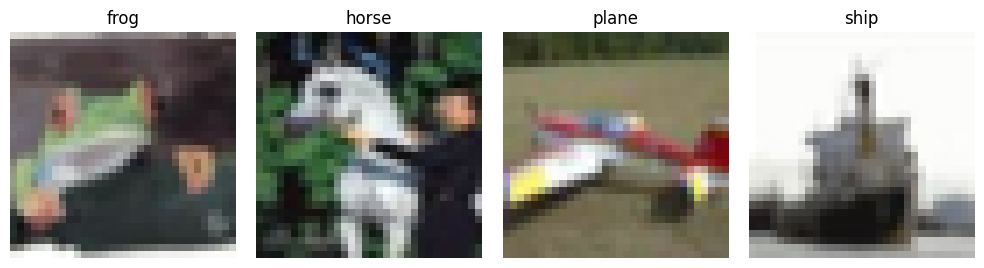

In [2]:
# transform the images to tensors and normalize them
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# load the CIFAR-10 dataset
train_full = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# split the training set into training and validation sets
train_size = int(0.8 * len(train_full))
val_size = len(train_full) - train_size
train_set, val_set = random_split(train_full, [train_size, val_size])

# create data loaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = DataLoader(val_set, batch_size=64, shuffle=False)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

# show some images
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck')

def show_images(loader):
    images, labels = next(iter(loader))
    images = images[:4]
    labels = labels[:4]
    
    images = images / 2 + 0.5
    
    plt.figure(figsize=(10, 10))
    for idx in range(4):
        plt.subplot(4, 4, idx+1)
        plt.imshow(images[idx].permute(1, 2, 0))
        plt.title(classes[labels[idx]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Test set size: {len(test_set)}")
show_images(train_loader)

# Code cell 3:
here we start with task 1 where we define a simple CNN, we first define the model by defining 2 convolutional layers with the appropriate inputs, then a max pooling layer, and at the end we define a fully connected layer.
Then we define the forward function that will apply the relu activation function on each layer and apply pooling and pass the data forward, basically defining the bhavior of the network.
after that we create a model and run it on the gpu, then we define the loss function and the optimizer.
after that we have the function that evaluates the model. It starts by training the model and evaluating it while storing the results in lists so that we can later plot the results.
The function trains the NN and it measures the loss to optimize it.
at the end we call the training function over the epochs and we plot the results.

Epoch [1/10], Train Loss: 1.4883, Train Acc: 0.4721, Val Loss: 1.2604, Val Acc: 0.5487, Test Acc: 0.5411
Epoch [2/10], Train Loss: 1.1940, Train Acc: 0.5796, Val Loss: 1.1069, Val Acc: 0.6083, Test Acc: 0.6019
Epoch [3/10], Train Loss: 1.0663, Train Acc: 0.6280, Val Loss: 1.0218, Val Acc: 0.6417, Test Acc: 0.6283
Epoch [4/10], Train Loss: 0.9786, Train Acc: 0.6583, Val Loss: 0.9824, Val Acc: 0.6560, Test Acc: 0.6491
Epoch [5/10], Train Loss: 0.9249, Train Acc: 0.6780, Val Loss: 0.9372, Val Acc: 0.6717, Test Acc: 0.6652
Epoch [6/10], Train Loss: 0.8743, Train Acc: 0.6966, Val Loss: 0.9361, Val Acc: 0.6760, Test Acc: 0.6605
Epoch [7/10], Train Loss: 0.8369, Train Acc: 0.7101, Val Loss: 0.9091, Val Acc: 0.6881, Test Acc: 0.6710
Epoch [8/10], Train Loss: 0.8100, Train Acc: 0.7206, Val Loss: 0.9028, Val Acc: 0.6888, Test Acc: 0.6757
Epoch [9/10], Train Loss: 0.7820, Train Acc: 0.7306, Val Loss: 0.8806, Val Acc: 0.6982, Test Acc: 0.6873
Epoch [10/10], Train Loss: 0.7575, Train Acc: 0.7369, V

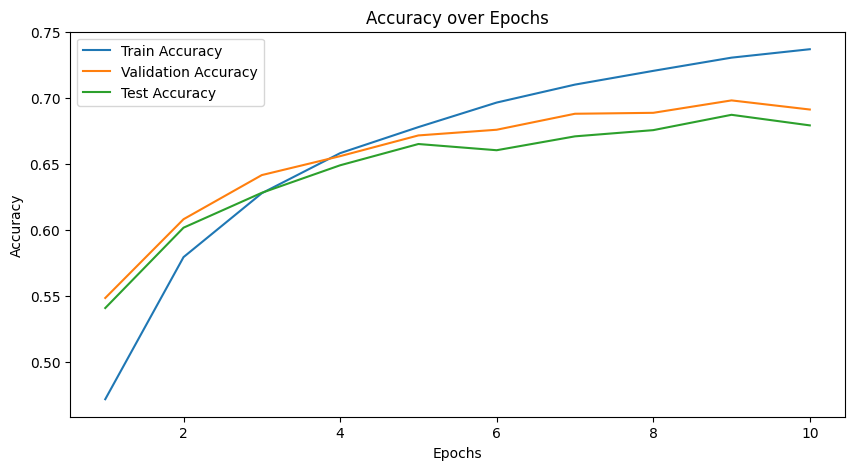

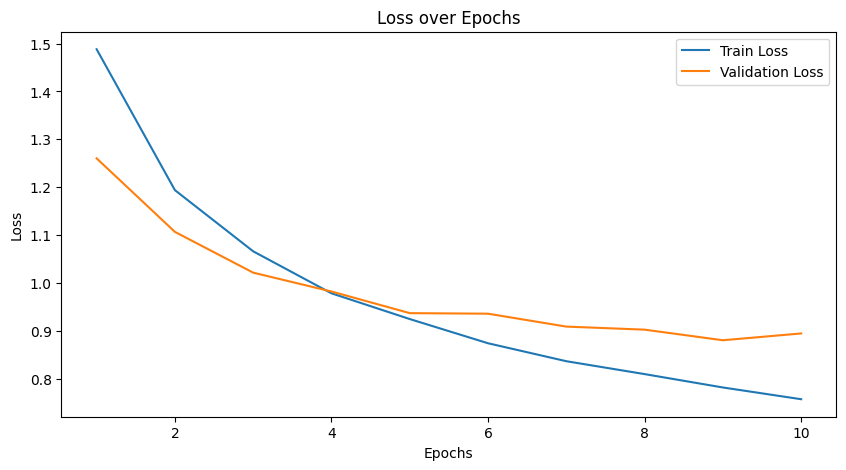

In [4]:
# define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 8 * 8, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = self.fc1(x)
        return x

# create the model, loss function, and optimizer
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# train the model and validate it on the validation set after each epoch and test it on the test set after training
def train_validate_test(model, train_loader, val_loader, test_loader, criterion, optimizer, num_epochs=10):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = epoch_loss / len(train_loader)
        train_losses.append(train_loss)
        train_acc = correct_train / total_train
        train_accuracies.append(train_acc)

        model.eval()
        val_epoch_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                val_loss = criterion(outputs, labels)
                val_epoch_loss += val_loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss = val_epoch_loss / len(val_loader)
        val_losses.append(val_loss)
        val_acc = correct_val / total_val
        val_accuracies.append(val_acc)

        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_acc = correct_test / total_test
        test_accuracies.append(test_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies, test_accuracies

# train the model and plot the loss and accuracy over epochs
num_epochs = 10
train_losses, val_losses, train_accuracies, val_accuracies, test_accuracies = train_validate_test(
    model, train_loader, val_loader, test_loader, criterion, optimizer, num_epochs=num_epochs
)

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


# Code cell 4:
Similar to what we did before, we didn't introduce anything new, except for the new NN, we added more layers and that's about it, but we can see that the result was slightly better due to the depth of the network

Epoch [1/10], Train Loss: 1.5770, Train Acc: 0.4235, Val Loss: 1.2957, Val Acc: 0.5209, Test Acc: 0.5188
Epoch [2/10], Train Loss: 1.1849, Train Acc: 0.5755, Val Loss: 1.0916, Val Acc: 0.6068, Test Acc: 0.6082
Epoch [3/10], Train Loss: 1.0021, Train Acc: 0.6424, Val Loss: 0.9482, Val Acc: 0.6626, Test Acc: 0.6487
Epoch [4/10], Train Loss: 0.8788, Train Acc: 0.6907, Val Loss: 0.9204, Val Acc: 0.6759, Test Acc: 0.6635
Epoch [5/10], Train Loss: 0.7822, Train Acc: 0.7227, Val Loss: 0.8484, Val Acc: 0.7027, Test Acc: 0.6781
Epoch [6/10], Train Loss: 0.7021, Train Acc: 0.7546, Val Loss: 0.8466, Val Acc: 0.7121, Test Acc: 0.6915
Epoch [7/10], Train Loss: 0.6322, Train Acc: 0.7783, Val Loss: 0.8141, Val Acc: 0.7197, Test Acc: 0.7102
Epoch [8/10], Train Loss: 0.5668, Train Acc: 0.8023, Val Loss: 0.8366, Val Acc: 0.7194, Test Acc: 0.7050
Epoch [9/10], Train Loss: 0.5097, Train Acc: 0.8208, Val Loss: 0.8055, Val Acc: 0.7323, Test Acc: 0.7187
Epoch [10/10], Train Loss: 0.4526, Train Acc: 0.8409, V

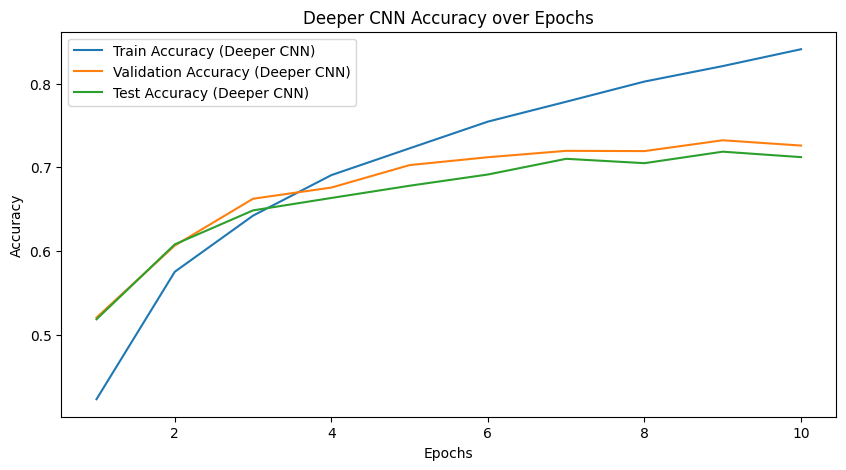

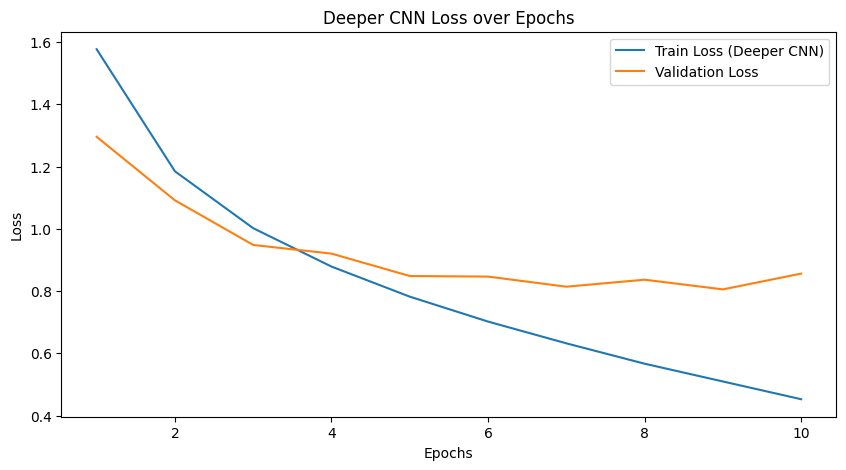

In [5]:
class DeeperCNN(nn.Module):
    def __init__(self):
        super(DeeperCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 2 * 2, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = self.pool(torch.relu(self.conv4(x)))
        x = x.view(-1, 128 * 2 * 2)
        x = self.fc1(x)
        return x

model_deeper = DeeperCNN().to(device)
criterion_deeper = nn.CrossEntropyLoss()
optimizer_deeper = optim.Adam(model_deeper.parameters(), lr=0.001)

num_epochs = 10
train_losses_deeper, val_losses_deeper, train_accuracies_deeper, val_accuracies_deeper, test_accuracies_deeper = train_validate_test(
    model_deeper, train_loader, val_loader, test_loader, criterion_deeper, optimizer_deeper, num_epochs=num_epochs
)

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies_deeper, label='Train Accuracy (Deeper CNN)')
plt.plot(range(1, num_epochs + 1), val_accuracies_deeper, label='Validation Accuracy (Deeper CNN)')
plt.plot(range(1, num_epochs + 1), test_accuracies_deeper, label='Test Accuracy (Deeper CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Deeper CNN Accuracy over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses_deeper, label='Train Loss (Deeper CNN)')
plt.plot(range(1, num_epochs + 1), val_losses_deeper, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Deeper CNN Loss over Epochs')
plt.legend()
plt.show()


# Code cell 5:
similar to what we did before as well, we only changed the kernel size and did the exact same steps as before, and the results show that the model didn't perform better with a larger kernel

Epoch [1/10], Train Loss: 1.6305, Train Acc: 0.4236, Val Loss: 1.3982, Val Acc: 0.5035, Test Acc: 0.5032
Epoch [2/10], Train Loss: 1.3422, Train Acc: 0.5246, Val Loss: 1.2713, Val Acc: 0.5449, Test Acc: 0.5440
Epoch [3/10], Train Loss: 1.2296, Train Acc: 0.5657, Val Loss: 1.2106, Val Acc: 0.5677, Test Acc: 0.5644
Epoch [4/10], Train Loss: 1.1559, Train Acc: 0.5929, Val Loss: 1.1602, Val Acc: 0.5868, Test Acc: 0.5831
Epoch [5/10], Train Loss: 1.1055, Train Acc: 0.6118, Val Loss: 1.1327, Val Acc: 0.5972, Test Acc: 0.5961
Epoch [6/10], Train Loss: 1.0644, Train Acc: 0.6279, Val Loss: 1.1123, Val Acc: 0.6088, Test Acc: 0.6020
Epoch [7/10], Train Loss: 1.0311, Train Acc: 0.6410, Val Loss: 1.1112, Val Acc: 0.6117, Test Acc: 0.6035
Epoch [8/10], Train Loss: 1.0015, Train Acc: 0.6497, Val Loss: 1.0911, Val Acc: 0.6178, Test Acc: 0.6070
Epoch [9/10], Train Loss: 0.9739, Train Acc: 0.6627, Val Loss: 1.0885, Val Acc: 0.6188, Test Acc: 0.6181
Epoch [10/10], Train Loss: 0.9543, Train Acc: 0.6667, V

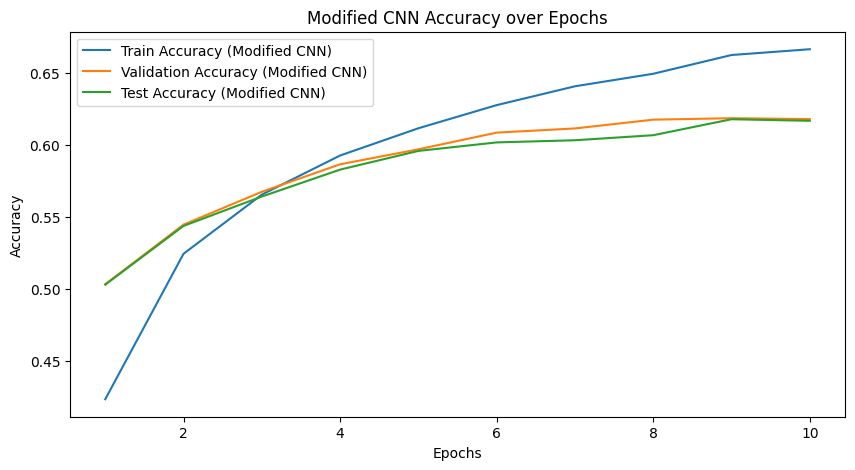

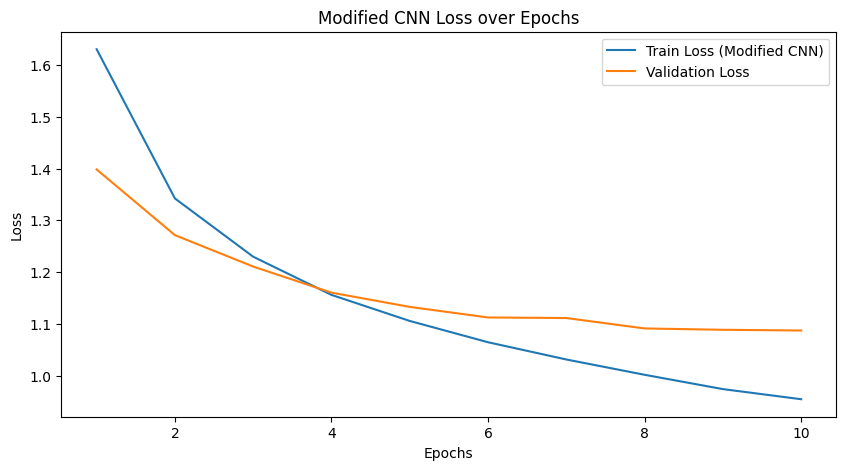

In [6]:
class ModifiedCNN(nn.Module):
    def __init__(self):
        super(ModifiedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=2, padding=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2) 
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 4 * 4, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 32 * 4 * 4)
        x = self.fc1(x)
        return x

model_modified = ModifiedCNN().to(device)
criterion_modified = nn.CrossEntropyLoss()
optimizer_modified = optim.Adam(model_modified.parameters(), lr=0.001)

num_epochs = 10
train_losses_modified, val_losses_modified, train_accuracies_modified, val_accuracies_modified, test_accuracies_modified = train_validate_test(
    model_modified, train_loader, val_loader, test_loader, criterion_modified, optimizer_modified, num_epochs=num_epochs
)

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies_modified, label='Train Accuracy (Modified CNN)')
plt.plot(range(1, num_epochs + 1), val_accuracies_modified, label='Validation Accuracy (Modified CNN)')
plt.plot(range(1, num_epochs + 1), test_accuracies_modified, label='Test Accuracy (Modified CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Modified CNN Accuracy over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses_modified, label='Train Loss (Modified CNN)')
plt.plot(range(1, num_epochs + 1), val_losses_modified, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Modified CNN Loss over Epochs')
plt.legend()
plt.show()


# Code cell 6:
here as well, we did everything we did before, but we took the best NN that we had in terms of accuracy and then applied average pooling instead of max pooling, and as we can see from the results, it wasn't better than the model with the same configuration and max pooling

Epoch [1/10], Train Loss: 1.7136, Train Acc: 0.3672, Val Loss: 1.4688, Val Acc: 0.4650, Test Acc: 0.4598
Epoch [2/10], Train Loss: 1.3773, Train Acc: 0.4998, Val Loss: 1.2655, Val Acc: 0.5452, Test Acc: 0.5377
Epoch [3/10], Train Loss: 1.2181, Train Acc: 0.5643, Val Loss: 1.1478, Val Acc: 0.5864, Test Acc: 0.5767
Epoch [4/10], Train Loss: 1.1160, Train Acc: 0.6020, Val Loss: 1.0881, Val Acc: 0.6137, Test Acc: 0.6053
Epoch [5/10], Train Loss: 1.0368, Train Acc: 0.6318, Val Loss: 1.0079, Val Acc: 0.6416, Test Acc: 0.6332
Epoch [6/10], Train Loss: 0.9707, Train Acc: 0.6560, Val Loss: 0.9740, Val Acc: 0.6550, Test Acc: 0.6452
Epoch [7/10], Train Loss: 0.9160, Train Acc: 0.6762, Val Loss: 0.9175, Val Acc: 0.6781, Test Acc: 0.6683
Epoch [8/10], Train Loss: 0.8698, Train Acc: 0.6917, Val Loss: 0.9048, Val Acc: 0.6840, Test Acc: 0.6732
Epoch [9/10], Train Loss: 0.8290, Train Acc: 0.7073, Val Loss: 0.8974, Val Acc: 0.6865, Test Acc: 0.6779
Epoch [10/10], Train Loss: 0.7841, Train Acc: 0.7249, V

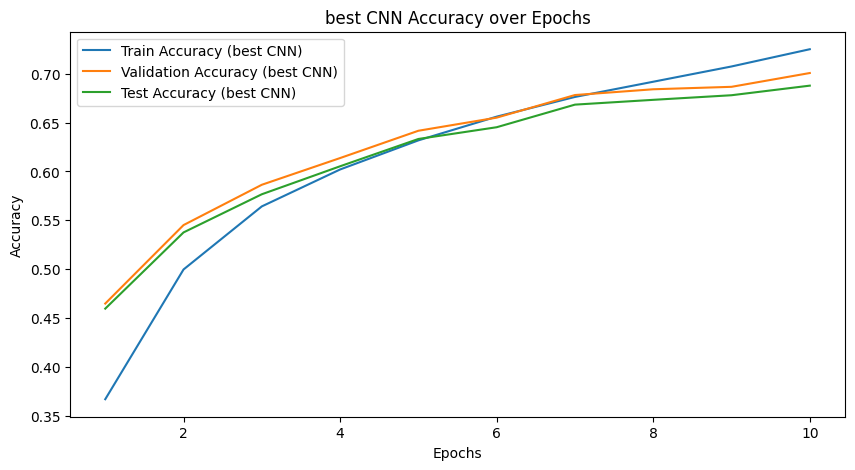

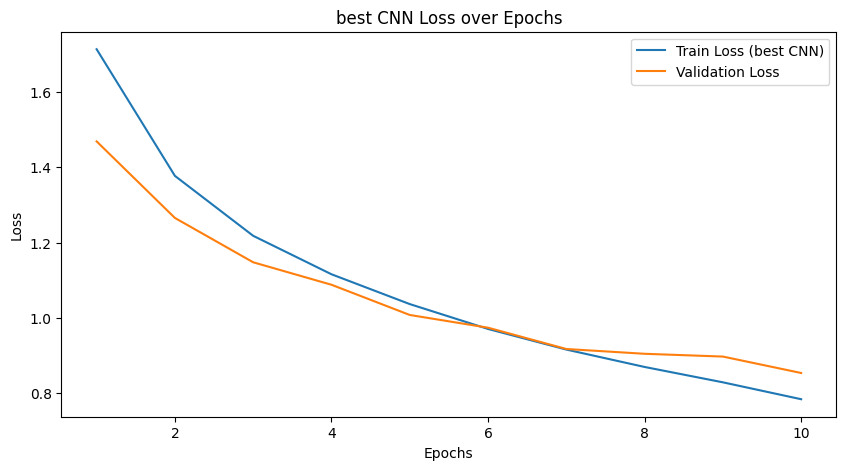

In [7]:
class BestCNN(nn.Module):
    def __init__(self):
        super(BestCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 2 * 2, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = self.pool(torch.relu(self.conv4(x)))
        x = x.view(-1, 128 * 2 * 2)
        x = self.fc1(x)
        return x

model_best_cnn = BestCNN().to(device)
criterion_best_cnn = nn.CrossEntropyLoss()
optimizer_best_cnn = optim.Adam(model_best_cnn.parameters(), lr=0.001)

num_epochs = 10
train_losses_deeper, val_losses_deeper, train_accuracies_deeper, val_accuracies_deeper, test_accuracies_deeper = train_validate_test(
    model_best_cnn, train_loader, val_loader, test_loader, criterion_best_cnn, optimizer_best_cnn, num_epochs=num_epochs
)

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies_deeper, label='Train Accuracy (best CNN)')
plt.plot(range(1, num_epochs + 1), val_accuracies_deeper, label='Validation Accuracy (best CNN)')
plt.plot(range(1, num_epochs + 1), test_accuracies_deeper, label='Test Accuracy (best CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('best CNN Accuracy over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses_deeper, label='Train Loss (best CNN)')
plt.plot(range(1, num_epochs + 1), val_losses_deeper, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('best CNN Loss over Epochs')
plt.legend()
plt.show()


# Code cell 7:
I didn't forget about this i promise, it was only at the bottom.
in this code cell we print each model's summary and we print the total amount of parameters

In [8]:
from torchsummary import summary

def print_model_details(model, input_size=(3, 32, 32)):
    print("Model Summary:")
    print(summary(model, input_size))

def count_parameters(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total Parameters: {total_params}")
    print(f"Trainable Parameters: {trainable_params}")
    return total_params, trainable_params

print("Simple Model Details:")
print_model_details(model)
total_params, trainable_params = count_parameters(model)

print("Deeper Model Details:")
print_model_details(model_deeper)
total_params, trainable_params = count_parameters(model_deeper)

print("Modified Model Details:")
print_model_details(model_modified)
total_params, trainable_params = count_parameters(model_modified)

print("BestCNN Model Details:")
print_model_details(model_best_cnn)
total_params, trainable_params = count_parameters(model_best_cnn)

Simple Model Details:
Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
         MaxPool2d-2           [-1, 16, 16, 16]               0
            Conv2d-3           [-1, 32, 16, 16]           4,640
         MaxPool2d-4             [-1, 32, 8, 8]               0
            Linear-5                   [-1, 10]          20,490
Total params: 25,578
Trainable params: 25,578
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.23
Params size (MB): 0.10
Estimated Total Size (MB): 0.34
----------------------------------------------------------------
None
Total Parameters: 25578
Trainable Parameters: 25578
Deeper Model Details:
Model Summary:
----------------------------------------------------------------
        Layer (type)               Outpu